In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Business Objective

The objective of this analysis is to understand the insurance attach percentage trends across branches, stores, and months for Jumbo & Company.
This analysis aims to identify high and low performing stores, observe seasonal trends, and generate actionable insights to improve attach rates.
Additionally, we predict the attach percentage for January at a store level based on historical trends.


## Data Loading and Overview

In this section, we load the dataset and perform an initial exploration to understand the structure, columns, and data quality.



In [19]:
import pandas as pd

df = pd.read_excel(r"F:\Zopper_Attach_Analysis\Data\Jumbo_Company_Attach.xls")     

df.head()


,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


The dataset contains store-level insurance attach percentage data across multiple branches and months from August to December.
The data is structured in a wide format, which will be reshaped for efficient analysis.


## Dataset Viewing and Understanding

In this section, we examine the dataset to understand its structure, columns, and overall content.
This step ensures clarity on what information is available before performing any analysis.


In [30]:
print(df.head())
print(df.info())

      Branch               Store_Name   Dec   Nov   Oct   Sep   Aug
0  Delhi_Ncr      Delhi(Janakpuri) Br  0.23  0.17  0.16  0.25  0.24
1  Delhi_Ncr      Haryana(Gurgaon) Br  0.21  0.26  0.15  0.28  0.04
2  Delhi_Ncr     Up(Greater Noida) Br  0.25  0.36  0.30  0.41  0.43
3       Pune         Pune(Bhosari) Br  0.33  0.33  0.36  0.13  0.32
4    Gujarat  Ahmedabad(Maninagar) Br  0.19  0.11  0.14  0.21  0.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB
None


The dataset contains store-level insurance attach percentage data across multiple branches.
Each row represents a unique store, while columns represent monthly attach percentages from August to December.

The dataset does not contain raw device sales or insurance count data, as attach percentages are already pre-calculated.
This makes the dataset suitable for comparative analysis, trend evaluation, and forecasting at store and branch levels.

No major data quality issues such as missing or inconsistent values were observed during the initial review.


## Data Preparation and Transformation

To enable time-series and grouped analysis, the dataset is transformed from wide format to long format.
This allows month-wise comparison across stores and branches.



In [76]:
long_df = df.melt(
    id_vars=['Branch', 'Store_Name'],
    value_vars=['Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    var_name='Month',
    value_name='Attach_Percentage'
)

# long_df['Attach_Percentage'] = long_df['Attach_Percentage']*100

if long_df['Attach_Percentage'].max() <= 1:
    long_df['Attach_Percentage'] = long_df['Attach_Percentage'] * 100

long_df.head()
long_df['Attach_Percentage'].describe()



count    815.000000
mean      18.023313
std       13.974026
min        0.000000
25%        8.000000
50%       17.000000
75%       26.000000
max      100.000000
Name: Attach_Percentage, dtype: float64

Restructuring the data into a long format improves analytical flexibility and aligns with industry-standard data analysis practices.
Attach percentages were converted into percentage values for better interpretability.


## Branch-wise Attach Percentage Analysis

This section analyzes average attach percentage across different branches to identify regional performance variations.



Branch-wise Attach Percentage Range:
Minimum Average: 11.835%
Maximum Average: 27.65%


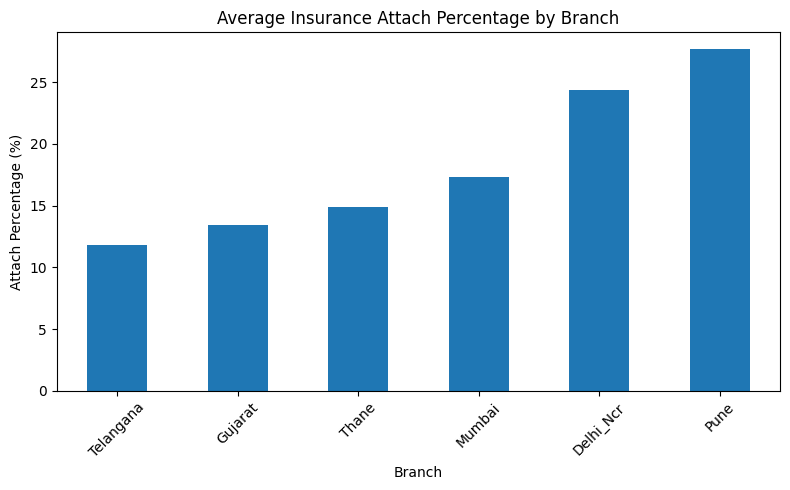

In [78]:
branch_avg = long_df.groupby("Branch")["Attach_Percentage"].mean().sort_values()

branch_min = branch_avg.min()
branch_max = branch_avg.max()

print("\nBranch-wise Attach Percentage Range:")
print(f"Minimum Average: {branch_min}%")
print(f"Maximum Average: {branch_max}%")

plt.figure(figsize=(8,5))
branch_avg.plot(kind="bar")
plt.ylabel("Attach Percentage (%)")
plt.title("Average Insurance Attach Percentage by Branch")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("visuals/branch_attach.png", dpi=300)
plt.show()


Significant variation in attach percentage is observed across branches.
High-performing branches may indicate better sales enablement or customer awareness, while lower-performing branches represent opportunities for targeted improvement initiatives.


## Month-wise Attach Percentage Trend Analysis

This analysis examines how attach percentage changes over time to identify seasonality or trend patterns.


Month-wise Average Attach Percentage:
Month
Aug    12.858896
Sep    16.730061
Oct    17.092025
Nov    21.711656
Dec    21.723926
Name: Attach_Percentage, dtype: float64

month-wise Attach Percentage Range:
Minimum Average: 12.86%
Maximum Average: 21.72%


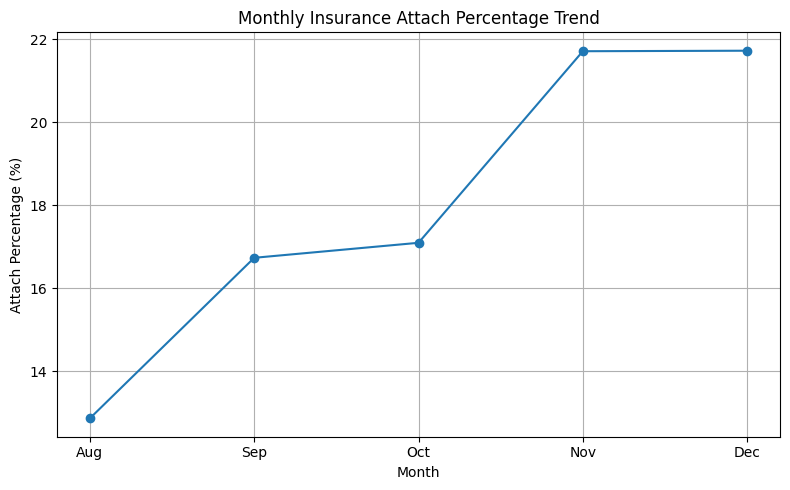

In [82]:
month_order = ["Aug", "Sep", "Oct", "Nov", "Dec"]
month_avg = long_df.groupby("Month")["Attach_Percentage"].mean().reindex(month_order)

month_min = month_avg.min().round(2)
month_max = month_avg.max().round(2)

print("Month-wise Average Attach Percentage:")
print(month_avg)
print("\nmonth-wise Attach Percentage Range:")
print(f"Minimum Average: {month_min}%")
print(f"Maximum Average: {month_max}%")

plt.figure(figsize=(8,5))
plt.plot(month_avg.index, month_avg.values, marker="o")
plt.ylabel("Attach Percentage (%)")
plt.xlabel("Month")
plt.title("Monthly Insurance Attach Percentage Trend")
plt.grid(True)
plt.tight_layout()

plt.savefig("visuals/monthly_trend.png", dpi=300)
plt.show()


The trend indicates month-on-month variation in attach percentage, suggesting possible seasonality effects.
These trends are critical inputs for forecasting January attach performance.


## Store-wise Attach Percentage Performance

This section evaluates store-level performance to identify consistently high-performing and underperforming stores.


Store_Name
Delhi(Hauz Khas)        62.2
Pune(Hadapsar)          58.6
Pune(Kondhawa)          41.4
Delhi(Budh Vihar)       39.0
Delhi(Daryaganj)        38.6
Pune(Dange Chowk)       36.8
Bhiwandi Br             36.2
Delhi(Narela)           35.8
Haryana(Mewla M.) Br    35.2
Up(Greater Noida) Br    35.0
Name: Attach_Percentage, dtype: float64 Store_Name
Ap(Vizag)                           3.4
Ulhasnagar Br                       2.2
Boisar Br                           2.0
Ap(Ntr Circle)                      0.0
Ap(Tirupathi-Leela Mahal Circle)    0.0
Ap(Rajamundry)                      0.0
Currey Road                         0.0
MAHIM(VS Next)                      0.0
Kharghar Br                         0.0
Vadodara(Kothi Road)                0.0
Name: Attach_Percentage, dtype: float64


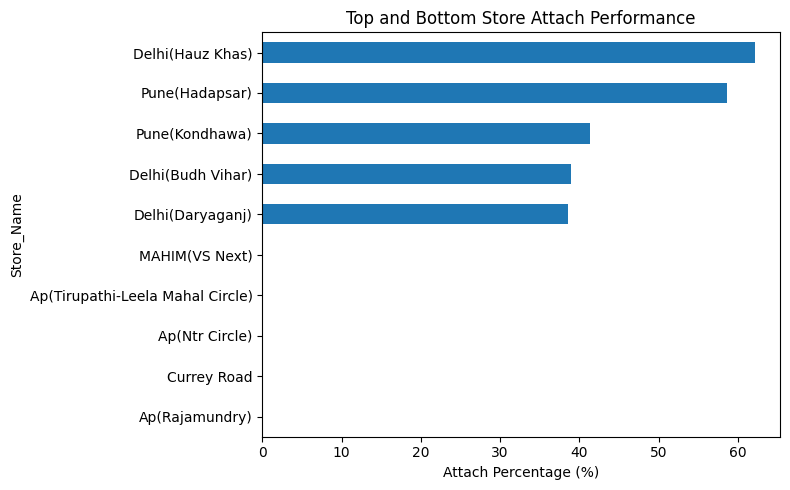

In [77]:
store_attach = (
    long_df
    .groupby('Store_Name')['Attach_Percentage']
    .mean()
    .sort_values(ascending=False)
)

top_stores = store_attach.head(10)
low_stores = store_attach.tail(10)

print(top_stores, low_stores)

# for visual
store_avg = long_df.groupby("Store_Name")["Attach_Percentage"].mean()

top_stores = store_avg.sort_values(ascending=False).head(5)
bottom_stores = store_avg.sort_values().head(5)

combined = pd.concat([top_stores, bottom_stores])

plt.figure(figsize=(8,5))
combined.sort_values().plot(kind="barh")
plt.xlabel("Attach Percentage (%)")
plt.title("Top and Bottom Store Attach Performance")
plt.tight_layout()

plt.savefig("visuals/store_performance.png", dpi=300)
plt.show()



A small group of stores consistently achieves high attach percentages, while several stores underperform.
This highlights a strong opportunity to replicate best practices from high-performing stores and address gaps in low-performing ones.


## Store Categorization Based on Attach Percentage

Stores are categorized into performance buckets to support targeted business actions.


          Store_Name  Attach_Percentage           Category
0   Delhi(Hauz Khas)               62.2  High Attach Store
1     Pune(Hadapsar)               58.6  High Attach Store
2     Pune(Kondhawa)               41.4  High Attach Store
3  Delhi(Budh Vihar)               39.0  High Attach Store
4   Delhi(Daryaganj)               38.6  High Attach Store


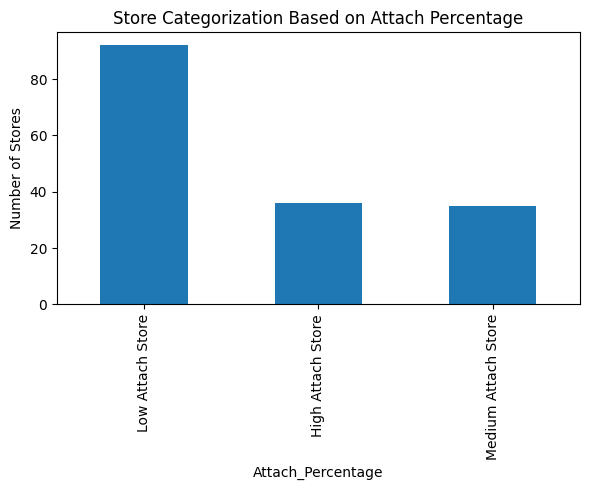

In [72]:
def categorize(x):
    if x >= 25:
        return "High Attach Store"
    elif 18 <= x < 25:  
        return "Medium Attach Store"
    else:
        return "Low Attach Store"

store_category = store_attach.reset_index()
store_category['Category'] = store_category['Attach_Percentage'].apply(categorize)

print(store_category.head())

# for visual
store_category = store_avg.apply(categorize).value_counts()

plt.figure(figsize=(6,5))
store_category.plot(kind="bar")
plt.ylabel("Number of Stores")
plt.title("Store Categorization Based on Attach Percentage")
plt.tight_layout()

plt.savefig("visuals/store_category.png", dpi=300)
plt.show()


Categorizing stores enables focused intervention strategies.
Low attach stores can be prioritized for training and incentives, while high attach stores can serve as benchmarks.


## January Attach Percentage Prediction

This section predicts store-level attach percentage for January using recent historical trends.


Overall Average January Attach Percentage: 20.18%
Predicted January Attach Percentage Range:
Minimum: 0.0%
Maximum: 61.33%

January Prediction Summary:
count    163.000000
mean      20.175869
std       11.673091
min        0.000000
25%       12.333333
50%       18.333333
75%       27.166667
max       61.333333
Name: Attach_Percentage, dtype: float64


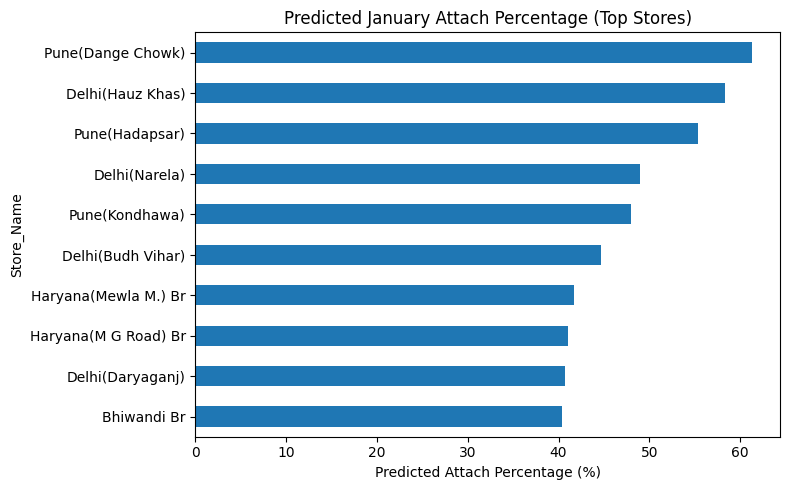

In [83]:
recent_data = long_df[long_df["Month"].isin(["Oct", "Nov", "Dec"])]

jan_prediction = recent_data.groupby("Store_Name")["Attach_Percentage"].mean()

jan_min = round(jan_prediction.min(), 2)
jan_max = round(jan_prediction.max(), 2)

overall_jan_avg = round(jan_prediction.mean(), 2)
print(f"Overall Average January Attach Percentage: {overall_jan_avg}%")

print("Predicted January Attach Percentage Range:")
print(f"Minimum: {jan_min}%")
print(f"Maximum: {jan_max}%")
print("\nJanuary Prediction Summary:")
print(jan_prediction.describe())

top_jan = jan_prediction.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_jan.sort_values().plot(kind="barh")
plt.xlabel("Predicted Attach Percentage (%)")
plt.title("Predicted January Attach Percentage (Top Stores)")
plt.tight_layout()

plt.savefig("visuals/january_prediction.png", dpi=300)
plt.show()




January attach percentage is estimated using the rolling average of the last three months,
assuming continuity of recent performance trends in the absence of major business changes.


## Key Business Recommendations

- Focus sales training initiatives on low attach stores with high sales potential.
- Replicate successful sales practices from high-performing stores across other locations.
- Introduce branch-specific incentive programs to improve attach percentage.
- Leverage festive and seasonal periods to bundle insurance offerings effectively.


## Overall Dataset Overview and Analysis Summary

This dataset contains store-level monthly insurance attach percentage data for Jumbo & Company across multiple branches.
The data spans five months (August to December) and captures how effectively device insurance plans were attached at the point of sale.

### Dataset Overview
- The dataset includes branch name, store name, and monthly attach percentages.
- Attach percentage represents the proportion of customers purchasing device insurance or protection plans along with their devices.
- The data is already aggregated at a store-month level, making it suitable for trend, comparison, and forecasting analysis.

### Analysis Performed
The analysis was structured to align with key business questions and Zopper’s objectives:

- **Branch-wise Analysis** was conducted to understand regional variations in attach performance.
- **Month-wise Trend Analysis** was performed to identify seasonal patterns and overall movement in attach percentages.
- **Store-wise Performance Analysis** helped identify consistently high-performing and underperforming stores.
- **Store Categorization** segmented stores into high, medium, and low attach performance buckets to enable targeted business actions.
- **January Attach Percentage Prediction** was estimated at a store level using recent historical trends.

### Key Business Value
This analysis provides actionable insights into where attach performance is strong and where improvement opportunities exist.
By identifying high-impact stores and branches, Zopper can focus training, incentive programs, and sales strategies more effectively.
The January prediction offers a forward-looking view to support planning and performance tracking.

### Conclusion
Overall, the analysis demonstrates how historical attach percentage data can be leveraged to derive meaningful business insights and support data-driven decision-making.
The approach taken reflects a practical and scalable analytical framework that can be extended with additional data such as device sales volume or plan type in the future.
